In [ ]:
import os
from io import BytesIO
import tarfile
import tempfile
from six.moves import urllib

from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

import tensorflow as tf 
import cv2


In [ ]:
#Load Model Using Inference Code
class DeepLabModel(object):
  """Class to load deeplab model and run inference."""

  INPUT_TENSOR_NAME = 'ImageTensor:0'
  OUTPUT_TENSOR_NAME = 'SemanticPredictions:0'
  INPUT_SIZE = 513
  FROZEN_GRAPH_NAME = 'frozen_inference_graph'

  def __init__(self, tarball_path):
    """Creates and loads pretrained deeplab model."""
    self.graph = tf.Graph()

    graph_def = None
    # Extract frozen graph from tar archive.
    tar_file = tarfile.open(tarball_path)
    for tar_info in tar_file.getmembers():
      if self.FROZEN_GRAPH_NAME in os.path.basename(tar_info.name):
        file_handle = tar_file.extractfile(tar_info)
        graph_def = tf.compat.v1.GraphDef.FromString(file_handle.read())
        break

    tar_file.close()

    if graph_def is None:
      raise RuntimeError('Cannot find inference graph in tar archive.')

    with self.graph.as_default():
      tf.import_graph_def(graph_def, name='')

    self.sess = tf.compat.v1.Session(graph=self.graph)

  def run(self, image):
    """Runs inference on a single image.

    Args:
      image: A PIL.Image object, raw input image.

    Returns:
      resized_image: RGB image resized from original input image.
      seg_map: Segmentation map of `resized_image`.
    """
    width, height = image.size
    resize_ratio = 1.0 * self.INPUT_SIZE / max(width, height)
    target_size = (int(resize_ratio * width), int(resize_ratio * height))
    resized_image = image.convert('RGB').resize(target_size, Image.ANTIALIAS)
    batch_seg_map = self.sess.run(
        self.OUTPUT_TENSOR_NAME,
        feed_dict={self.INPUT_TENSOR_NAME: [np.asarray(resized_image)]})
    seg_map = batch_seg_map[0]
    return resized_image, seg_map





In [ ]:
# Lint as: python2, python3
# Copyright 2018 The TensorFlow Authors All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
"""Visualizes the segmentation results via specified color map.
Visualizes the semantic segmentation results by the color map
defined by the different datasets. Supported colormaps are:
* ADE20K (http://groups.csail.mit.edu/vision/datasets/ADE20K/).
* Cityscapes dataset (https://www.cityscapes-dataset.com).
* Mapillary Vistas (https://research.mapillary.com).
* PASCAL VOC 2012 (http://host.robots.ox.ac.uk/pascal/VOC/).
"""

import numpy as np

# Dataset names.
_ADE20K = 'ade20k'
_CITYSCAPES = 'cityscapes'
_MAPILLARY_VISTAS = 'mapillary_vistas'
_PASCAL = 'pascal'

# Max number of entries in the colormap for each dataset.
_DATASET_MAX_ENTRIES = {
    _ADE20K: 151,
    _CITYSCAPES: 256,
    _MAPILLARY_VISTAS: 66,
    _PASCAL: 512,
}


def create_ade20k_label_colormap():
  """Creates a label colormap used in ADE20K segmentation benchmark.
  Returns:
    A colormap for visualizing segmentation results.
  """
  return np.asarray([
      [0, 0, 0],
      [120, 120, 120],
      [180, 120, 120],
      [6, 230, 230],
      [80, 50, 50],
      [4, 200, 3],
      [120, 120, 80],
      [140, 140, 140],
      [204, 5, 255],
      [230, 230, 230],
      [4, 250, 7],
      [224, 5, 255],
      [235, 255, 7],
      [150, 5, 61],
      [120, 120, 70],
      [8, 255, 51],
      [255, 6, 82],
      [143, 255, 140],
      [204, 255, 4],
      [255, 51, 7],
      [204, 70, 3],
      [0, 102, 200],
      [61, 230, 250],
      [255, 6, 51],
      [11, 102, 255],
      [255, 7, 71],
      [255, 9, 224],
      [9, 7, 230],
      [220, 220, 220],
      [255, 9, 92],
      [112, 9, 255],
      [8, 255, 214],
      [7, 255, 224],
      [255, 184, 6],
      [10, 255, 71],
      [255, 41, 10],
      [7, 255, 255],
      [224, 255, 8],
      [102, 8, 255],
      [255, 61, 6],
      [255, 194, 7],
      [255, 122, 8],
      [0, 255, 20],
      [255, 8, 41],
      [255, 5, 153],
      [6, 51, 255],
      [235, 12, 255],
      [160, 150, 20],
      [0, 163, 255],
      [140, 140, 140],
      [250, 10, 15],
      [20, 255, 0],
      [31, 255, 0],
      [255, 31, 0],
      [255, 224, 0],
      [153, 255, 0],
      [0, 0, 255],
      [255, 71, 0],
      [0, 235, 255],
      [0, 173, 255],
      [31, 0, 255],
      [11, 200, 200],
      [255, 82, 0],
      [0, 255, 245],
      [0, 61, 255],
      [0, 255, 112],
      [0, 255, 133],
      [255, 0, 0],
      [255, 163, 0],
      [255, 102, 0],
      [194, 255, 0],
      [0, 143, 255],
      [51, 255, 0],
      [0, 82, 255],
      [0, 255, 41],
      [0, 255, 173],
      [10, 0, 255],
      [173, 255, 0],
      [0, 255, 153],
      [255, 92, 0],
      [255, 0, 255],
      [255, 0, 245],
      [255, 0, 102],
      [255, 173, 0],
      [255, 0, 20],
      [255, 184, 184],
      [0, 31, 255],
      [0, 255, 61],
      [0, 71, 255],
      [255, 0, 204],
      [0, 255, 194],
      [0, 255, 82],
      [0, 10, 255],
      [0, 112, 255],
      [51, 0, 255],
      [0, 194, 255],
      [0, 122, 255],
      [0, 255, 163],
      [255, 153, 0],
      [0, 255, 10],
      [255, 112, 0],
      [143, 255, 0],
      [82, 0, 255],
      [163, 255, 0],
      [255, 235, 0],
      [8, 184, 170],
      [133, 0, 255],
      [0, 255, 92],
      [184, 0, 255],
      [255, 0, 31],
      [0, 184, 255],
      [0, 214, 255],
      [255, 0, 112],
      [92, 255, 0],
      [0, 224, 255],
      [112, 224, 255],
      [70, 184, 160],
      [163, 0, 255],
      [153, 0, 255],
      [71, 255, 0],
      [255, 0, 163],
      [255, 204, 0],
      [255, 0, 143],
      [0, 255, 235],
      [133, 255, 0],
      [255, 0, 235],
      [245, 0, 255],
      [255, 0, 122],
      [255, 245, 0],
      [10, 190, 212],
      [214, 255, 0],
      [0, 204, 255],
      [20, 0, 255],
      [255, 255, 0],
      [0, 153, 255],
      [0, 41, 255],
      [0, 255, 204],
      [41, 0, 255],
      [41, 255, 0],
      [173, 0, 255],
      [0, 245, 255],
      [71, 0, 255],
      [122, 0, 255],
      [0, 255, 184],
      [0, 92, 255],
      [184, 255, 0],
      [0, 133, 255],
      [255, 214, 0],
      [25, 194, 194],
      [102, 255, 0],
      [92, 0, 255],
  ])


def create_cityscapes_label_colormap():
  """Creates a label colormap used in CITYSCAPES segmentation benchmark.
  Returns:
    A colormap for visualizing segmentation results.
  """
  colormap = np.zeros((256, 3), dtype=np.uint8)
  colormap[0] = [128, 64, 128]
  colormap[1] = [244, 35, 232]
  colormap[2] = [70, 70, 70]
  colormap[3] = [102, 102, 156]
  colormap[4] = [190, 153, 153]
  colormap[5] = [153, 153, 153]
  colormap[6] = [250, 170, 30]
  colormap[7] = [220, 220, 0]
  colormap[8] = [107, 142, 35]
  colormap[9] = [152, 251, 152]
  colormap[10] = [70, 130, 180]
  colormap[11] = [220, 20, 60]
  colormap[12] = [255, 0, 0]
  colormap[13] = [0, 0, 142]
  colormap[14] = [0, 0, 70]
  colormap[15] = [0, 60, 100]
  colormap[16] = [0, 80, 100]
  colormap[17] = [0, 0, 230]
  colormap[18] = [119, 11, 32]
  return colormap


def create_mapillary_vistas_label_colormap():
  """Creates a label colormap used in Mapillary Vistas segmentation benchmark.
  Returns:
    A colormap for visualizing segmentation results.
  """
  return np.asarray([
      [165, 42, 42],
      [0, 192, 0],
      [196, 196, 196],
      [190, 153, 153],
      [180, 165, 180],
      [102, 102, 156],
      [102, 102, 156],
      [128, 64, 255],
      [140, 140, 200],
      [170, 170, 170],
      [250, 170, 160],
      [96, 96, 96],
      [230, 150, 140],
      [128, 64, 128],
      [110, 110, 110],
      [244, 35, 232],
      [150, 100, 100],
      [70, 70, 70],
      [150, 120, 90],
      [220, 20, 60],
      [255, 0, 0],
      [255, 0, 0],
      [255, 0, 0],
      [200, 128, 128],
      [255, 255, 255],
      [64, 170, 64],
      [128, 64, 64],
      [70, 130, 180],
      [255, 255, 255],
      [152, 251, 152],
      [107, 142, 35],
      [0, 170, 30],
      [255, 255, 128],
      [250, 0, 30],
      [0, 0, 0],
      [220, 220, 220],
      [170, 170, 170],
      [222, 40, 40],
      [100, 170, 30],
      [40, 40, 40],
      [33, 33, 33],
      [170, 170, 170],
      [0, 0, 142],
      [170, 170, 170],
      [210, 170, 100],
      [153, 153, 153],
      [128, 128, 128],
      [0, 0, 142],
      [250, 170, 30],
      [192, 192, 192],
      [220, 220, 0],
      [180, 165, 180],
      [119, 11, 32],
      [0, 0, 142],
      [0, 60, 100],
      [0, 0, 142],
      [0, 0, 90],
      [0, 0, 230],
      [0, 80, 100],
      [128, 64, 64],
      [0, 0, 110],
      [0, 0, 70],
      [0, 0, 192],
      [32, 32, 32],
      [0, 0, 0],
      [0, 0, 0],
      ])


def create_pascal_label_colormap():
  """Creates a label colormap used in PASCAL VOC segmentation benchmark.
  Returns:
    A colormap for visualizing segmentation results.
  """
  colormap = np.zeros((_DATASET_MAX_ENTRIES[_PASCAL], 3), dtype=int)
  ind = np.arange(_DATASET_MAX_ENTRIES[_PASCAL], dtype=int)

  for shift in reversed(list(range(8))):
    for channel in range(3):
      colormap[:, channel] |= bit_get(ind, channel) << shift
    ind >>= 3

  return colormap


def get_ade20k_name():
  return _ADE20K


def get_cityscapes_name():
  return _CITYSCAPES


def get_mapillary_vistas_name():
  return _MAPILLARY_VISTAS


def get_pascal_name():
  return _PASCAL


def bit_get(val, idx):
  """Gets the bit value.
  Args:
    val: Input value, int or numpy int array.
    idx: Which bit of the input val.
  Returns:
    The "idx"-th bit of input val.
  """
  return (val >> idx) & 1


def create_label_colormap(dataset=_PASCAL):
  """Creates a label colormap for the specified dataset.
  Args:
    dataset: The colormap used in the dataset.
  Returns:
    A numpy array of the dataset colormap.
  Raises:
    ValueError: If the dataset is not supported.
  """
  if dataset == _ADE20K:
    return create_ade20k_label_colormap()
  elif dataset == _CITYSCAPES:
    return create_cityscapes_label_colormap()
  elif dataset == _MAPILLARY_VISTAS:
    return create_mapillary_vistas_label_colormap()
  elif dataset == _PASCAL:
    return create_pascal_label_colormap()
  else:
    raise ValueError('Unsupported dataset.')


def label_to_color_image(label, dataset=_PASCAL):
  """Adds color defined by the dataset colormap to the label.
  Args:
    label: A 2D array with integer type, storing the segmentation label.
    dataset: The colormap used in the dataset.
  Returns:
    result: A 2D array with floating type. The element of the array
      is the color indexed by the corresponding element in the input label
      to the dataset color map.
  Raises:
    ValueError: If label is not of rank 2 or its value is larger than color
      map maximum entry.
  """
  if label.ndim != 2:
    raise ValueError('Expect 2-D input label. Got {}'.format(label.shape))

  if np.max(label) >= _DATASET_MAX_ENTRIES[dataset]:
    raise ValueError(
        'label value too large: {} >= {}.'.format(
            np.max(label), _DATASET_MAX_ENTRIES[dataset]))
  #print(label)
  colormap = create_label_colormap(dataset)
  colormap_sub = []
  
  if (dataset == 'ade20k'):
    for x in colormap:
      colormap_sub.append([0,0,0])
    colormap_sub[15] = [255, 255, 255]
    colormap_sub[13] = [255,255,255]
    colormap_sub = np.asarray(colormap_sub)
    return colormap_sub[label]
    
  return colormap[label]


def get_dataset_colormap_max_entries(dataset):
  return _DATASET_MAX_ENTRIES[dataset]

In [ ]:
#Visualize Tools

def vis_segmentation(image, seg_map):
  """Visualizes input image, segmentation map and overlay view."""
  plt.figure(figsize=(15, 5))
  grid_spec = gridspec.GridSpec(1, 4, width_ratios=[6, 6, 6, 1])

  plt.subplot(grid_spec[0])
  plt.imshow(image)
  plt.axis('off')
  plt.title('input image')

  plt.subplot(grid_spec[1])
  seg_image = label_to_color_image(seg_map).astype(np.uint8)
  plt.imshow(seg_image)
  plt.axis('off')
  plt.title('segmentation map')

  plt.subplot(grid_spec[2])
  plt.imshow(image)
  plt.imshow(seg_image, alpha=0.7)
  plt.axis('off')
  plt.title('segmentation overlay')

  unique_labels = np.unique(seg_map)
  ax = plt.subplot(grid_spec[3])
  plt.imshow(
      FULL_COLOR_MAP[unique_labels].astype(np.uint8), interpolation='nearest')
  ax.yaxis.tick_right()
  plt.yticks(range(len(unique_labels)), LABEL_NAMES[unique_labels])
  plt.xticks([], [])
  ax.tick_params(width=0.0)
  plt.grid('off')
  plt.show()


LABEL_NAMES = np.asarray([
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv','tv2',
        'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv','tv2',
        'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv','tv2',
        'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv','tv2',
        'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv','tv2',
        'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv','tv2',
        'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv','tv2',
        'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa'
])
_ADE20K = 'ade20k'
_CITYSCAPES = 'cityscapes'
_MAPILLARY_VISTAS = 'mapillary_vistas'
_PASCAL = 'pascal'

print(get_dataset_colormap_max_entries(_ADE20K))
FULL_LABEL_MAP = np.arange(len(LABEL_NAMES)).reshape(len(LABEL_NAMES), 1)

FULL_COLOR_MAP = label_to_color_image(FULL_LABEL_MAP, _ADE20K)


151


In [ ]:
#Select Pretained Model  -MobileNetV2 ................-MobileNetV3...... xception its DeepLab v3+
MODEL_NAME = "xception_coco_voctrainaug" #@param ["mobilenetv2_coco_voctrainaug", "mobilenetv2_coco_voctrainval", "xception_coco_voctrainaug", "xception_coco_voctrainval", "mobilenetv2Adek20", "mobilenetv3_small_cityscapes_trainfine"]

_DOWNLOAD_URL_PREFIX = 'http://download.tensorflow.org/models/'
_MODEL_URLS = {
    'mobilenetv2_coco_voctrainaug':
        'deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz',
    'mobilenetv2_coco_voctrainval':
        'deeplabv3_mnv2_pascal_trainval_2018_01_29.tar.gz',
    'xception_coco_voctrainaug':
        'deeplabv3_pascal_train_aug_2018_01_04.tar.gz',
    'xception_coco_voctrainval':
        'deeplabv3_pascal_trainval_2018_01_04.tar.gz',
    'mobilenetv2Adek20': 'deeplabv3_mnv2_ade20k_train_2018_12_03.tar.gz',
    'mobilenetv3_small_cityscapes_trainfine': 'deeplab_mnv3_small_cityscapes_trainfine_2019_11_15.tar.gz'
}
_TARBALL_NAME = 'deeplab_model.tar.gz'

#Make Folder For Temporal Directory and File
model_dir = tempfile.mkdtemp()
tf.io.gfile.makedirs(model_dir)

download_path = os.path.join(model_dir, _TARBALL_NAME)
print('downloading model, this might take a while...')
urllib.request.urlretrieve(_DOWNLOAD_URL_PREFIX + _MODEL_URLS[MODEL_NAME],
                   download_path)
print('download completed! loading DeepLab model...')

MODEL = DeepLabModel(download_path)
print('model loaded successfully!')

downloading model, this might take a while...
download completed! loading DeepLab model...
model loaded successfully!


In [ ]:
import time
image_test = Image.open('./hector.jpg')

--- 0.9822547435760498 seconds ---


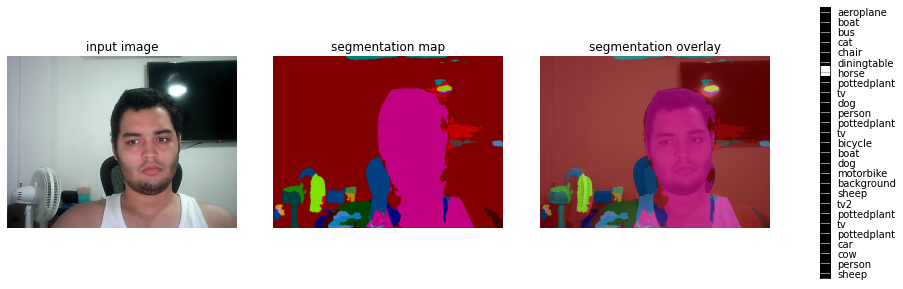

In [ ]:
#Run the Model mobilenet V2

start_time = time.time()


image_test = Image.open('./hector.jpg')
resized_image, seg_map = MODEL.run(image_test)
print("--- %s seconds ---" % (time.time() - start_time))


#Visualize Image Mobile NetV2 cocoVOC
vis_segmentation(resized_image, seg_map)


In [ ]:
#Run the Model v3


start_time = time.time()
resized_image, seg_map = MODEL.run(image_test)
print("--- %s seconds ---" % (time.time() - start_time))

#Visualize Image Exception deeplabv3+
#vis_segmentation(resized_image, seg_map)

--- 6.235980033874512 seconds ---


In [ ]:
#Run the Model EXCEPTION


resized_image, seg_map = MODEL.run(image_test)
#print(get_dataset_colormap_max_entries(_ADE20K))
print("--- %s seconds ---" % (time.time() - start_time))


#Visualize
#vis_segmentation(resized_image, seg_map)


--- 91.14646196365356 seconds ---


--- 4.8697052001953125 seconds ---


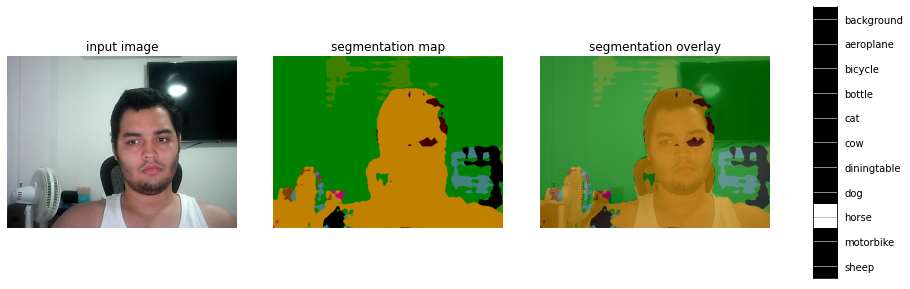

In [ ]:
#Run the Model MobilenetV3 -CityDataset

start_time = time.time()
resized_image, seg_map = MODEL.run(image_test)
#print(get_dataset_colormap_max_entries(_ADE20K))
print("--- %s seconds ---" % (time.time() - start_time))


#Visualize
vis_segmentation(resized_image, seg_map)